# **Tugas 2 PBE**

**Oleh:** <br>
**Benony Gabriel - NIM: 105222002**

**Soal** <br>
Diketahui data pencemaran emisi CO2 di Indonesia dari sumber berikut: 
https://ourworldindata.org/co2/country/indonesia  
Dari data tersebut, gunakan model eksponensial dan logistik untuk memprediksi pertumbuah CO2 
dengan menyelesaikan beberapa soal di bawah ini. 
1. Selesaikan secara numerik model pertumbuhan eksponensialnya kemudian bikin grafik solusi 
dari model tersebut beserta data aktualnya 
2. Selesaikan secara numerik model pertumbuhan logistiknya kemudian bikin grafik solusi dari 
model tersebut beserta data aktualnya 
3. Dari poin 3 dan 4 lakukan intepretasi dari dua model tersebut, lalu berikan kesimpulan 
diantara dua model tersebut yang cocok dengan data emisi CO2 apakah model eksponensial 
atau model logistik.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Membaca file csv
data = pd.read_csv('dataset/cleaned-data/cleaned_data_covid19_deaths.csv')

# Memahami struktur data
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1808 entries, 0 to 1807
Data columns (total 3 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Entity                                                     1808 non-null   object 
 1   Day                                                        1808 non-null   object 
 2   Total confirmed deaths due to COVID-19 per 100,000 people  1808 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.5+ KB


(      Entity         Day  \
 0  Indonesia  2020-01-04   
 1  Indonesia  2020-01-05   
 2  Indonesia  2020-01-06   
 3  Indonesia  2020-01-07   
 4  Indonesia  2020-01-08   
 
    Total confirmed deaths due to COVID-19 per 100,000 people  
 0                                                0.0          
 1                                                0.0          
 2                                                0.0          
 3                                                0.0          
 4                                                0.0          ,
 None,
        Total confirmed deaths due to COVID-19 per 100,000 people
 count                                        1808.000000        
 mean                                           40.682040        
 std                                            23.361526        
 min                                             0.000000        
 25%                                            14.644020        
 50%                                

## 1. Model Pertumbuhan Eksponensial

Model eksponensial menggambarkan pertumbuhan yang tidak terbatas dan dinyatakan dengan persamaan:  
$$
P(t) = P_0 \cdot e^{r \cdot t}
$$

In [42]:
# Ekstraksi data tahun dan emisi
days = data['Day']
deaths = data['Total confirmed deaths due to COVID-19 per 100,000 people']

# Definisikan model pertumbuhan eksponensial: P(t) = P0 * e^(r * t)
def exponential_model(t, P0, r):
    return P0 * np.exp(r * t)

# Normalisasi tahun untuk stabilitas numerik (misalnya, mulai dari 0)
t_normalized = days - days.min()

# Fit model eksponensial ke data
params, covariance = curve_fit(exponential_model, t_normalized, deaths, p0=[1e-6, 0.01])

# Ekstraksi parameter
P0, r = params

# Hasilkan prediksi menggunakan model yang telah di-fit
days_range = np.linspace(t_normalized.min(), t_normalized.max(), 500)
predicted_deaths = exponential_model(days_range, P0, r)

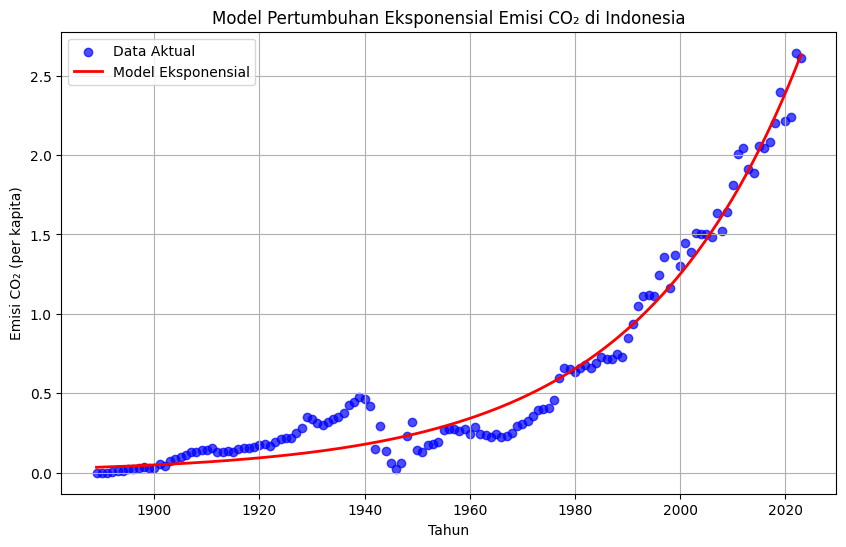

(np.float64(0.034363725619727274), np.float64(0.03237555649549655))

In [43]:
# Plot data dan model yang telah di-fit 
plt.figure(figsize=(10, 6))
plt.scatter(days, deaths, color='blue', label='Data Aktual', alpha=0.7)
plt.plot(days.min() + days_range, predicted_deaths, color='red', label='Model Eksponensial', linewidth=2)
plt.title('Model Pertumbuhan Eksponensial Emisi CO₂ di Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Emisi CO₂ (per kapita)')
plt.legend()
plt.grid()
plt.show()

# Menampilkan parameter model yang telah di-fit
P0, r

## 2. Model Pertumbuhan Logistik

Model logistik menggambarkan pertumbuhan dengan pembatasan kapasitas maksimum $ K $:
$$
P(t) = \frac{K}{1 + \left(\frac{K - P_0}{P_0}\right) \cdot e^{-r \cdot t}}
$$
dengan:
- $ P_0 $: Emisi awal.
- $ r $: Laju pertumbuhan.
- $ K $: Kapasitas maksimum.

In [44]:
# Definisikan model pertumbuhan logistik: P(t) = K / (1 + ((K - P0) / P0) * e^(-r * t))
def logistic_model(t, P0, r, K):
    return K / (1 + ((K - P0) / P0) * np.exp(-r * t))

# Fit model logistik ke data
params_logistic, covariance_logistic = curve_fit(
    logistic_model, t_normalized, deaths, p0=[0.01, 0.01, deaths.max() * 1.5]
)

# Ekstraksi parameter
P0_logistic, r_logistic, K_logistic = params_logistic

# Hasilkan prediksi menggunakan model logistik yang telah di-fit
predicted_deaths_logistic = logistic_model(days_range, P0_logistic, r_logistic, K_logistic)

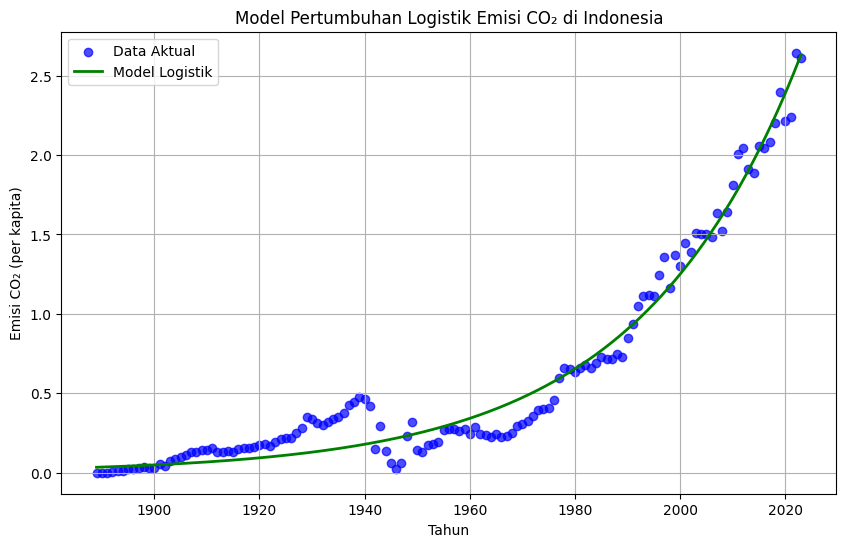

(np.float64(0.03436378316343951),
 np.float64(0.032375534608668086),
 np.float64(-1780898.766601112))

In [45]:
# Plot data aktual dan prediksi model logistik
plt.figure(figsize=(10, 6))
plt.scatter(days, deaths, color='blue', label='Data Aktual', alpha=0.7)
plt.plot(days.min() + days_range, predicted_deaths_logistic, color='green', label='Model Logistik', linewidth=2)
plt.title('Model Pertumbuhan Logistik Emisi CO₂ di Indonesia')
plt.xlabel('Tahun')
plt.ylabel('Emisi CO₂ (per kapita)')
plt.legend()
plt.grid()
plt.show()

# Menampilkan parameter yang di-fit untuk model logistik
P0_logistic, r_logistic, K_logistic
